# Hacktiv8 Phase 0: Non Graded Challenge 12

---

By [Rifky Aliffa](https://github.com/Penzragon)

Dataset yang digunakan adalah dataset Covid-19 Indonesia, yang dapat dilihat di [Kaggle](https://www.kaggle.com/hendratno/covid19-indonesia).

Instructions:

- Lakukan hypothesis testing terhadap dataset diatas.
- Ambil kesimpulan dari hasil analisa.

## Import Library

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
covid = pd.read_csv('covid_19_indonesia_time_series_all.csv')
covid.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


### Data Characteristics

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [4]:
covid.describe().T

,count,mean,std,min,25%,50%,75%,max
New Cases,21759.0,3.912936e+02,2.074551e+03,0.000000,7.000000e+00,4.100000e+01,1.510000e+02,5.675700e+04
New Deaths,21759.0,1.322041e+01,7.648262e+01,0.000000,0.000000e+00,1.000000e+00,5.000000e+00,2.069000e+03
New Recovered,21759.0,3.773110e+02,1.999063e+03,0.000000,4.000000e+00,3.100000e+01,1.430000e+02,4.883200e+04
New Active Cases,21759.0,7.621674e-01,9.372135e+02,-25725.000000,-1.600000e+01,0.000000e+00,2.700000e+01,3.672600e+04
Total Cases,21759.0,8.525997e+04,3.685133e+05,1.000000,1.822500e+03,1.078000e+04,3.646450e+04,4.257243e+06
Total Deaths,21759.0,2.648289e+03,1.177601e+04,0.000000,5.000000e+01,2.830000e+02,1.050000e+03,1.438580e+05
Total Recovered,21759.0,7.671260e+04,3.403957e+05,0.000000,1.038500e+03,8.745000e+03,3.293250e+04,4.105680e+06
Total Active Cases,21759.0,5.899079e+03,2.751810e+04,-2306.000000,1.820000e+02,9.190000e+02,2.607500e+03,5.741350e+05
City or Regency,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Regencies,21759.0,2.416026e+01,6.870827e+01,1.000000,7.000000e+00,1.100000e+01,1.800000e+01,4.160000e+02


## Data Exploration

<AxesSubplot:xlabel='New Active Cases', ylabel='Count'>

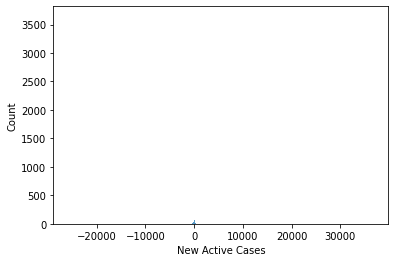

In [5]:
sns.histplot(data=covid, x='New Active Cases')

<AxesSubplot:xlabel='New Active Cases'>

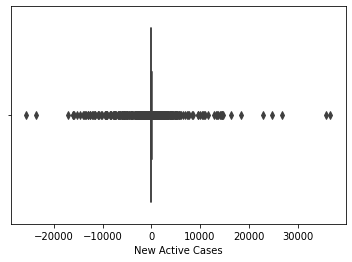

In [6]:
sns.boxplot(data=covid, x='New Active Cases')

### Outlier Removal

In [8]:
Q1 = np.quantile(covid['New Active Cases'], 0.25)
Q3 = np.quantile(covid['New Active Cases'], 0.75)
IQR = Q3 - Q1

In [9]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

In [10]:
covid = covid[(covid['New Active Cases'] > lower_limit) & (covid['New Active Cases'] < upper_limit)]

<AxesSubplot:xlabel='New Active Cases', ylabel='Count'>

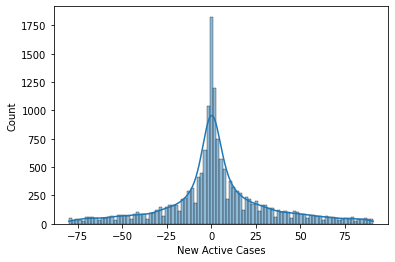

In [13]:
sns.histplot(data=covid, x='New Active Cases', kde=True)

<AxesSubplot:xlabel='New Active Cases'>

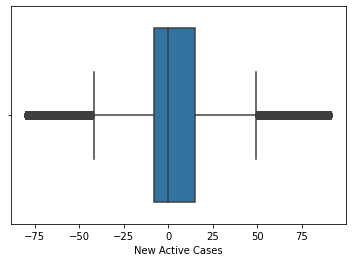

In [12]:
sns.boxplot(data=covid, x='New Active Cases')

### Hypothesis Testing

In [69]:
jabar = covid[covid['Location'] == 'Jawa Barat']

In [70]:
jabar

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
6,3/3/2020,ID-JB,Jawa Barat,1,1,0,0,1,1,8,...,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,800.00%,NaN,NaN
10,3/4/2020,ID-JB,Jawa Barat,1,0,0,1,2,1,8,...,-6.920432,0.02,0.04,0.00,0.02,0.00,50.00%,400.00%,1.00,0.0
14,3/5/2020,ID-JB,Jawa Barat,1,0,0,1,3,1,8,...,-6.920432,0.02,0.07,0.00,0.02,0.00,33.33%,266.67%,1.00,1.0
19,3/6/2020,ID-JB,Jawa Barat,1,0,0,1,4,1,8,...,-6.920432,0.02,0.09,0.00,0.02,0.00,25.00%,200.00%,1.00,1.0
24,3/7/2020,ID-JB,Jawa Barat,0,0,0,0,4,1,8,...,-6.920432,0.00,0.09,0.00,0.02,0.00,25.00%,200.00%,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21605,11/28/2021,ID-JB,Jawa Barat,25,0,28,-3,707696,14732,691935,...,-6.920432,0.55,15670.40,0.00,326.21,32.62,2.08%,97.77%,0.56,0.0
21639,11/29/2021,ID-JB,Jawa Barat,29,2,95,-68,707725,14734,692030,...,-6.920432,0.64,15671.04,0.04,326.25,32.63,2.08%,97.78%,1.16,NaN
21672,11/30/2021,ID-JB,Jawa Barat,68,3,57,8,707793,14737,692087,...,-6.920432,1.51,15672.55,0.07,326.32,32.63,2.08%,97.78%,2.34,1.5
21705,12/1/2021,ID-JB,Jawa Barat,58,0,8,50,707851,14737,692095,...,-6.920432,1.28,15673.83,0.00,326.32,32.63,2.08%,97.77%,0.85,0.0


<AxesSubplot:xlabel='New Active Cases', ylabel='Count'>

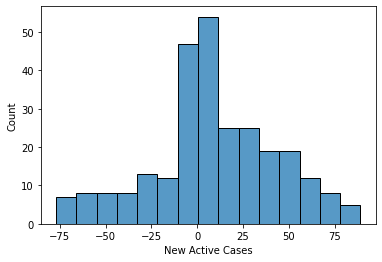

In [71]:
sns.histplot(data=jabar, x='New Active Cases')

In [72]:
jabar_active_mean = np.mean(jabar['New Active Cases'])
print(f'New Active Cases Mean: {round(jabar_active_mean)}')

New Active Cases Mean: 9


Dari perhitungan rata-rata diatas, dapat disimpulkan terdapat **9 kasus aktif baru** setiap harinya di Jawa Barat.

#### One Sample T-test

Hipotesis: **Terdapat lebih dari 15 kasus aktif baru covid-19 setiap harinya di Jawa Barat**.

Jadi:
- **H0: μ <= 15**
- **H1: μ > 15**

In [85]:
tstat, pval = stats.ttest_1samp(jabar['New Active Cases'], 15)
print(f'P-value: {pval/2}')
print(f'T-stat: {tstat}')

P-value: 0.00235722343086192
T-stat: -2.849707599025062


In [86]:
ci = stats.norm.interval(0.90, jabar['New Active Cases'].mean(), jabar['New Active Cases'].std()) # Confidence Interval

<Figure size 3600x7200 with 0 Axes>

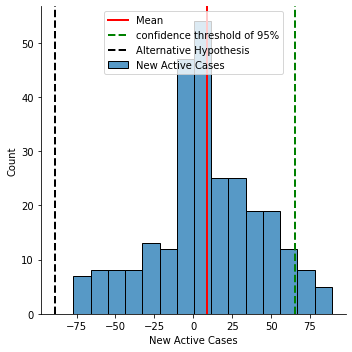

In [87]:
fig = plt.figure(figsize=(50, 100))
sns.displot(jabar['New Active Cases'], label='New Active Cases')
plt.axvline(jabar['New Active Cases'].mean(), color='red', linewidth=2, label='Mean')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(jabar['New Active Cases'].mean() + tstat*jabar['New Active Cases'].std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

Karena p-value lebih kecil dari significant threshold (**0.05**), maka **H0** dapat dibuktikan benar yang mana **kasus aktif baru setiap harinya kurang dari atau sama dengan 15** di Jawa Barat.